# Data Modeling using Statistic Vectorization Model of the Data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import preprocessing_nlp as pp

#### Load the vocabulary dictionaries for building word stats

In [2]:
vocab_dict = pp.get_cefr_word_dictionary()
adv_vocab_dict = pp.get_cefr_word_dictionary_adv()

#### Load the main data frame containing the readings and asscoiated levels



In [3]:
# One-stop
# data = pd.read_csv('data/one_stop.csv')

# CEFR
cefr_data = pd.read_csv('data/cefr_readings.csv')

#### Add average word per document to dataframe

In [4]:
# One-Stop
# avg_word = pp.get_avg_word_length(data, 'documents')
# data['avg_word_len'] = avg_word

# CEFR
cefr_avg_word = pp.get_avg_word_length(cefr_data, 'documents')
cefr_data['avg_word_len'] = cefr_avg_word

#### Load Word levels Data Frame. Use previously loaded vocabulary dictionies

In [5]:
# One-Stop
# levels_df = pp.get_word_level_dataframe(data, 'documents', vocab_dict, adv_vocab_dict)

# CEFR
cefr_levels_df = pp.get_word_level_dataframe(cefr_data, 'documents', vocab_dict, adv_vocab_dict)

#### Chart used in presenation slide (not shown here)

In [6]:
# cefr_levels_df[:10].plot.barh(stacked=True, figsize=(12, 6), title='Word Level Distribution for the First Ten Documents');

#### Load Parts of Speech Dataframe. Drop entries with fewer than 2000 and 100 entries in the columns to avoid noise

In [7]:
# One-Stop
# pos_df = pp.get_part_of_speech_dataframe(data, 'documents')

# drop_pos = []
# for row in pd.DataFrame(pos_df.sum()).iterrows():
#     if row[1][0] < 2000:
#         drop_pos.append(row[0])
# drop_pos

# pos_df.drop(drop_pos, axis=1, inplace=True)

# CEFR
cefr_pos_df = pp.get_part_of_speech_dataframe(cefr_data, 'documents')

drop_pos = []
for row in pd.DataFrame(cefr_pos_df.sum()).iterrows():
    if row[1][0] < 100:
        drop_pos.append(row[0])
drop_pos

cefr_pos_df.drop(drop_pos, axis=1, inplace=True)

In [8]:
# cefr_pos_df[-28:-8].plot.barh(stacked=True, figsize=(25, 4), title='Word Level Distribution for the First Ten Documents');

In [9]:
# # Exploration of parts-of-speech distributions
# total = sum(counts)
# for c in counts:
#     print(c, c/total)
# sum(pd.DataFrame(pos_df.sum()).values[:, 0].tolist())

#### Load the Full Data Frame for analysis

In [10]:
# One-Stop
# df = pp.get_full_dataframe(data, 'documents', 'level', levels_df, pos_df)

# CEFR
cefr_df = pp.get_full_dataframe(cefr_data, 'documents', 'cefr_level', cefr_levels_df, cefr_pos_df)

In [11]:
# features = ['num_of_words', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
cefr_drop = ['documents','cefr_level']
# one_stop_drop = ['documents', 'doc_list', 'avg_num_words', 'total_num_sents', 'total_num_words', 'words_per_sents', 'level']

# documents = df.drop(one_stop_drop, axis=1)
cefr_documents = cefr_df.drop(cefr_drop, axis=1)

# target = df['level']
cefr_target = cefr_df['cefr_level']


## From previous experiments with the One-Stop-English-Corpus
# three_levels = []
# for level in cefr_df['cefr_level']:
#     if level == 0:
#         three_levels.append('Ele')
    
#     elif ((level == 1) or (level == 2)):
#         three_levels.append('Int')
    
#     else:
#         three_levels.append('Adv')


# cefr_target = three_levels


# X_train = documents
# y_train = target

# X_test = cefr_documents
# y_test = cefr_target

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.2, random_state=29)
X_train, X_test, y_train, y_test = train_test_split(cefr_documents, cefr_target, test_size=0.3, random_state=29)

#### Book Excerpts for Testing

In [12]:
# Twilight Excerpt
twilight = "Tyler, trying to win back her attention, asked Lauren's opinion on a CD he held. She was distracted. I stared at the \
deep-voiced boy, taken aback, but he was looking away toward the dark forest behind us. He'd said that the Cullens didn't come here, \
but his tone had implied something more—that they weren't allowed; they were prohibited. His manner left a strange impression on me, \
and I tried toignore it without success."

In [13]:
# Great Gatsby Excerpt
gg = "He smiled understandingly-much more than understandingly. It was one of those rare smiles with a quality of eternal reassurance \
in it, that you may come across four or five times in life. It faced--or seemed to face--the whole eternal world for an instant, and \
then concentrated on you with an irresistible prejudice in your favor. It understood you just as far as you wanted to be understood, \
believed in you as you would like to believe in yourself, and assured you that it had precisely the impression of you that, at your \
best, you hoped to convey"

In [14]:
# Charlie and the Chocolate Factory Exerpt
cc = "Mr Willy Wonka can make marshmallows that taste of violets, and rich caramels that change colour every ten seconds as you suck \
them, and little feathery sweets that melt away deliciously the moment you put them between your lips. He can make chewing-gum that \
never loses its taste, and sugar balloons that you can blow up to enormous sizes before you pop them with a pin and gobble them up. \
And, by a most secret method, he can make lovely blue birds' eggs with black spots on them, and when you put one of these in your \
mouth, it gradually gets smaller and smaller until suddenly there is nothing left except a tiny little DARKRED sugary baby bird \
sitting on the tip of your tongue."

#### Best Model: Multinomial Naive Bayes

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# pipe_nb = make_pipeline(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
pipe_nb = make_pipeline(MultinomialNB())

pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train, y_train))
print("Valid Acc.: ", pipe_nb.score(X_test, y_test))

Training Acc.:  0.7205240174672489
Valid Acc.:  0.696969696969697


In [16]:
test_pred = pipe_nb.predict(X_test)

In [17]:
list_of_keys = cefr_pos_df.columns.tolist()
twilight_sample = pp.process_sample(twilight, list_of_keys, vocab_dict, adv_vocab_dict)
gatsby_sample = pp.process_sample(gg, list_of_keys, vocab_dict, adv_vocab_dict)
charlie_sample = pp.process_sample(cc, list_of_keys, vocab_dict, adv_vocab_dict)

In [18]:
print(f'Twilight predicted level: {pipe_nb.predict([twilight_sample])}')
print(f'Gatsby predicted level: {pipe_nb.predict([gatsby_sample])}')
print(f'Charlie predicted level: {pipe_nb.predict([charlie_sample])}')

Twilight predicted level: ['B2']
Gatsby predicted level: ['B2']
Charlie predicted level: ['B1']


Confusion Matrix


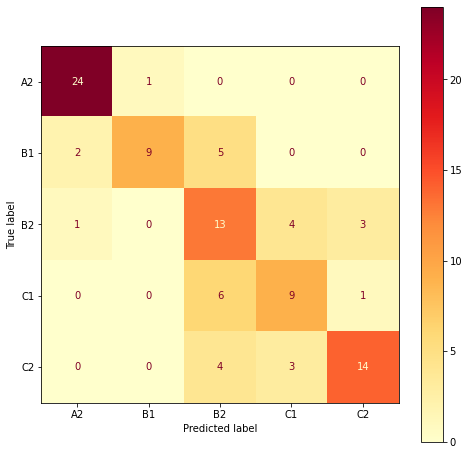

In [19]:
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix')
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe_nb, X_test, y_test, cmap='YlOrRd', ax=ax);


# cm = metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
# disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=pipe_nb.classes_, cmap='blue')
# disp.plot();

Confusion Matrix


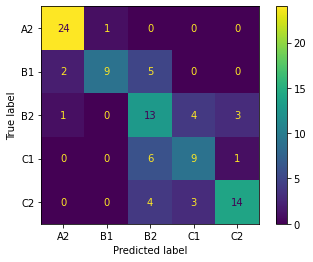

In [20]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score 
from sklearn.metrics import f1_score, classification_report, accuracy_score 
from sklearn.metrics import RocCurveDisplay, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn import metrics

print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot();
# plt.show()

#### Model: Gradient Boosting Classifer

In [21]:
pipe_nb = make_pipeline(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))

pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train, y_train))
print("Valid Acc.: ", pipe_nb.score(X_test, y_test))

Training Acc.:  1.0
Valid Acc.:  0.8383838383838383


#### Model: Logistic Regression: One vs Rest

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(max_iter=5000)).fit(X_train, y_train)

print("Training Acc.: ", clf.score(X_train, y_train))
print("Valid Acc.: ", clf.score(X_test, y_test))

Training Acc.:  0.9344978165938864
Valid Acc.:  0.7878787878787878


In [23]:
clf.predict(X_test)

array(['B2', 'A2', 'B2', 'C2', 'B2', 'C2', 'A2', 'C1', 'A2', 'C1', 'B1',
       'B1', 'A2', 'A2', 'B1', 'C1', 'A2', 'C1', 'C2', 'B2', 'C2', 'A2',
       'B1', 'B2', 'B2', 'C1', 'A2', 'B1', 'B1', 'C2', 'B2', 'B1', 'B2',
       'C2', 'C1', 'B1', 'C1', 'C1', 'A2', 'A2', 'B1', 'B2', 'C2', 'C2',
       'A2', 'A2', 'B1', 'A2', 'B2', 'C2', 'B2', 'C1', 'C1', 'B1', 'A2',
       'A2', 'B2', 'C2', 'A2', 'A2', 'A2', 'B1', 'B2', 'B1', 'B2', 'C1',
       'C2', 'A2', 'C2', 'C1', 'B2', 'A2', 'C1', 'B2', 'C1', 'C1', 'C2',
       'A2', 'C1', 'C1', 'B1', 'B1', 'C2', 'A2', 'B2', 'C1', 'B2', 'B2',
       'C2', 'C1', 'A2', 'C2', 'A2', 'A2', 'C1', 'C2', 'B1', 'A2', 'B1'],
      dtype='<U2')

In [24]:
print(f'Twilight predicted level: {clf.predict([twilight_sample])}')
print(f'Gatsby predicted level: {clf.predict([gatsby_sample])}')
print(f'Charlie predicted level: {clf.predict([charlie_sample])}')

Twilight predicted level: ['A2']
Gatsby predicted level: ['B1']
Charlie predicted level: ['B1']


Confusion Matrix


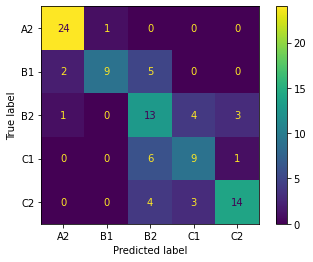

In [25]:
print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = metrics.confusion_matrix(y_test, test_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
# plt.show()